# Goal

### Predict the length of stay of a patient upon admission.

# Key Questions

### Concepts
* <b>Which ML model would you use to tackle that problem?</b>

I initially used the xgboost regressor. Gradient boosting tends to provide the best performance for vanilla machine learning models. I then used a neural network, which can capture more complex feature interactions and allows for categorical embeddings, which often capture more information than other encoding methods

* <b>Which assumptions do you have to make given the available data? (e.g. Do you need to perform any NLP to facilitate the task?)</b>

I didn't use NLP because there were codes to serve as proxies for the descriptions. I tried to capture the relevant information by target encoding the codes (making them ordinal but losing distinction between the different codes). I could characterize that as an assumption that there was enough information contained in the regularized target mean for a categorical variable to make a positive impact on the model. I did not have time to test this against one-hot, so that wasn't validated. 

I likely lost relevant interactions by target encoding, but one-hot would have exploded an already large dataset. There is likely information relevant to feature interctions in those descriptions. Given more time I'd love to dig into the text fields more. Categorical embeddings appears to have helped.

I made a couple of assumptions about which features would leak the target (e.g. disposition and charges). They're noted in my notes.

* <b>Which feature(s) have more predictive power for the given task? Why?</b>

APR DRG Code: ["DRG, which is based on your age, gender, diagnosis, and the surgical procedures involved."](https://www.verywellhealth.com/drg-101-what-is-a-drg-how-does-it-work-3916755) It appears to be a synthesis of several relevant factors. Another guess, patients cost money for each day of stay, and the hospital may try to remove a patient before they become unprofitable.

APR Severity of Illness Code: the more severely ill somebody is, the more likely they are to have to stay longer


### Application - Build a working model to solve this problem.
* <b>What is your model’s performance?</b>

MAE:  3.29 days on a target with a mean of 5.5 days for the xgboost model and 0.73 days on the neural network.

* <b>For which cases does your model perform poorly? Why?</b>

As the length of stay increased, the model's performance continued to decrease. I imagine there's greater variance for length of stay among the mix of conditions that produce longer stays. I didn't have much time to dig into why. I would use t-SNE to see if there were particular clusters for poor performance, as well as shap values for the poor performers to see which features were contributing the poor predictions. Target encoding can lose feature interactions, which likely contributed to performance issues with the xgboost model.

* <b>If you had more time to work on this, how would you increase your current performance by 10%? Please explain.</b>

For the sake the assignment's integrity I didn't look at outside resources to see if anyone else has tried to tackle this problem. Typically it's the second thing I do (after I make a first go at a model). There are plenty of smart people who have likely engineered features or have additional insight into the problem that would help improve the model. I'd like to go back and see how other people approached this.


### Questions
* <b>Propose 2 additional questions that might be answered using this dataset.</b>

Predict total charges for a patient upon admission

Predict age group for a patient (the prediction isn't the useful thing here - it's the shap values and PDPs generated from the model, which I imagine could provide insight to public health specialists or epidemiologists)

* <b>How you would answer these questions? Elaborate.</b>

Total charges: Regression problem, so xgboost regressor, lightgbm regressor, or tabular nn for the model. Drop total costs and patient disposition, then investigate to see if any others leak the target. Encode either with with either mean of categorical embedding. If gradient boosting, do a large grid search on a subsample of the data and grab coffee, because it's going to be a minute. If tabular model, check the LR find plot, run for several epochs, and then repeat until overfitting starts. 

Age group: classification problem, so gradient boosted classifier or tabular nn for the model. I would need to first look into how pediatric and geriatric diseases and procedures are labeled to avoid leakage. This one may require one-hot encoding, but categorical embeddings would also work. Target encoding would not. I might build two models for this one. Some people prefer a "coefficient" interpreation of dependence, like you get in linear models (monotonic). There's an "enforce monotonic constraints" option for xgboost that will build a model that has a monotonic relationship with each feature, and give you monotonic pdps. For people more comfortable with flexibility, the unconstrained model may produce interating questions along the lines of 

# <span style="color:blue">Data Dict Notes</span>

#### Total Charges

`Total charges for the discharge.` This will almost certainly leak the target. Every day in the hospital results in additional charges. <b> drop </b>

#### Total Costs

`Total estimated costs for the discharge.` I'm not certain what the difference between this and total charges is - maybe costs for the hospital? Likely leaky as well. <b>drop</b>, but would investigate further if I had more time. 

#### Attending Provider License Number

`The professional license number, issued by the New York State Department of Education, used to identify the physician or other health care professional primarily responsible for the care of the patient.` I imagine different physicians have different tastes for how long to keep a patient. Possible candidate for target encoding, though it may cause overfitting without further investigation. On the other hand, it seems unlikely that attending physician would be known at time of admission <b>drop</b>

#### CCS Procedure Code

`Type is Char. Length is 3. AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code.` Seems likely that some patients will have multiple procedures - I'll check that out when I get into the data. <b>Target encode</b>. <span style="color:red">Don't know if information available at time of admission.</span>

#### CCS Procedure Description

`Typeis Char. Length is 450. AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Description.` Likely value to be found in this, but will require work that I don't have time for. CCS Procedure Code w/ target encoding should be fine given constraints. <b> Drop </b>

#### APR Medical Surgical Description
`Type is Char. Length is 14. The APR-DRG specific classification of Medical, Surgical or Not Applicable.` <b>Target encode</b>

#### APR Risk of Mortality
`Type is Char. Length is 8. All Patient Refined Risk ofMortality (APR ROM). Minor (1), Moderate (2), Major (3) , Extreme (4).` <b>Target encode</b>

#### APR Severity of IllnessDescription
`Type is Char. Length is 8. All Patient Refined Severity of Illness (APR SOI) Description. Minor (1), Moderate (2), Major (3) , Extreme (4).` <b>Target encode</b>

#### APR MDC Description
`Type is Char. Length is 200. All Patient Refined Major Diagnostic Category (APR MDC) Description.` <b>Drop</b> but possible NLP candidate 

#### APR MDC Code
`Type is Char. Length is 2. All Patient Refined Major Diagnostic Category (APR MDC) Code.  APR-DRG Codes 001-006 and 950-956 may group to more than one MDC Code.  All other APR DRGs group to one MDC category. ` Will need to dig into the more than MDC Code a bit. <b>Target encode</b>

#### APR DRG Code
`Type is Char. Length is 3. The APR-DRG Classification Code` <b> Target Encode </b> span style="color:red">Don't know if information available at time of admission.</span>

#### APR DRG Description
`Type is Char. Length is 89. The APR-DRG Classification Code DescriptionIn Calendar Year 2011, Version 28 of the APR-DRG Grouper.  http://www.health.ny.gov/statistics/sparcs/sysdoc/appy.htm` <b>Drop</b>

#### Discharge Year
I'm pretty sure this is just 2009. I'll double check and then <b> drop </b>

#### CCS Diagnosis Code
`Type is Char. Length is 3.AHRQ Clinical Classification Software (CCS) Diagnosis Category Code.` <b> Target encode</b>. <span style="color:red">Don't know if information available at time of admission.</span>

#### CCS Diagnosis Description
`Type is Char. Length is 450. AHRQ Clinical Classification Software (CCS) Diagnosis Category Description.` Candidate for NLP but CCS Diagnosis Code should do for now. <b>Drop</b>

#### Patient Disposition
`Type is Char. Length is 37. The patient's destination or status upon discharge.` This is after discharge, so leaky. <b> Drop </b>

#### Type of Admission
`Type is Char. Length is 15. A description of the manner in which the patient was admitted to the health care facility:  Elective, Emergency, Newborn, Not Available, Trauma, Urgent` <b>Target Encode</b>

#### Ethnicity
`Type is Char. Length is 20. Patient ethnicity. The ethnicity of the patient:  Spanish/Hispanic Origin, Not of Spanish/Hispanic Origin, Multi, Unknown.` <b> Target Encode</b>

#### Race
`Type is Char. Length is 32. Patient race.  Black/African American, Multi, Other Race, Unknown, White.   Other Race includes Native Americansand Asian/Pacific Islander.` <b> Target Encode </b>

#### Gender
`Type is Char. Length is 1. Patient gender:  (M) Male, (F) Female, (U) Unknown` <b> Target Encode </b>

#### Zip Code -3 digits
`Type is Char. Length is 3. The first three digits of the patient's zip code.  Blank for:-population size less than 20,000-abortion records, or-cell size less than 10 on population classification strata.“OOS” are Out of State zip codes.` <b> Target Encode </b>

#### AgeGroup
`Type is Char. Length is 11. Age in years at time of discharge. Grouped into the following age groups: 0 to 17, 18 to 29, 30 to 49, 50 to 69, and 70 or Older.` I'm actually a little skeptical that anyone is going to be reading this, but in case you haven't guessed it: <b> Target Encode </b>

#### Facility Name
`Type is Char. Length is 70. The name of the facility where services were performed based on the Permanent Facility Identifier (PFI), as maintained by the NYSDOH Division of Health Facility Planning. For abortion records ‘Abortion Record –Facility Name Redacted’ appears` Covered by facility ID, so <b> drop </b>

#### Facility ID
`Type is Num. Length is 6. Permanent Facility Identifier. Blank for abortion records.` <b> Target Encode </b>

#### Operating Certificate Number
`Type is Char. Length is 8. The facility Operating Certificate Number as assigned by NYS Department of Health.  Blank for abortion records.` Covered by facility ID, so <b>Drop</b>

#### Hospital County
`Type is Char. Length is 11.  A description of the county in which the hospital is located.Blank for abortion records.` Worth investigating with more time: are these dropdown or hand-entered? Like could somebody type "Wane County" and "Wayne County" for the same county? That could cause problems. <b> Target encode </b>

#### HealthService Area
`Type is Char. Length is 15.  A description of the Health Service Area (HSA) in which the hospital is located.  Blank for abortion records. Capital/Adirondack, Central NY, Finger Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.` Possibly redundant but you never know. <b> Target encode </b>


#### Operating Provider License Number
`Type is Char. Length is 8. The professional license number, issued by the New York State Department of Education, used to identify the physician or other healthcare professional who performed the principal procedure. Blank for abortion records` <b>Drop</b>

#### Other Provider License Number
`Type is Char. Length is 8. The professional license number, issued by the New York State Department of Education, used to identify the physician or other health care professional (other than the Attending Physician or Operating Physician) who was involved in the patient's care or treatment (e.g., consulting physician, second operating physician, nurse/midwife).  Blank for abortion records.` Possible overfitting. Maybe another time. <b>Drop</b>

___

___

# <span style="color:blue">Initial Investigation</span>

First step is looking at the data with as few preconceptions as possible.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2009.csv')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.shape

(2600627, 37)

In [2]:
# check memory
!free -m

             total       used       free     shared    buffers     cached
Mem:         31144       5798      25346          0       1007       2304
-/+ buffers/cache:       2486      28658
Swap:            0          0          0


### Observation

Data is fairly large. I would typically use a mix of Dask and Pandas with a subsample of the data and/or changing the column data type. I've decided to use a large AWS sagemaker instance given the time limitations.

## Understand Data

In [3]:
df.describe()

,Operating Certificate Number,Permanent Facility Id,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Costs
count,2.595296e+06,2.595296e+06,2600626.0,2.598603e+06,2.598603e+06,2.600626e+06,2.600626e+06,2.600626e+06,2.595295e+06,1.884066e+06,5.146630e+05,2.600626e+06,2.600626e+06
mean,5.004360e+06,1.035686e+03,2009.0,1.922415e+02,1.083825e+02,4.052607e+02,1.012561e+01,1.902586e+00,1.417929e+06,1.590906e+06,1.945320e+06,3.182508e+02,1.129775e+04
std,2.252109e+06,6.459671e+02,0.0,1.566281e+02,8.788507e+01,2.408612e+02,5.935469e+00,8.890252e-01,9.186118e+06,9.707181e+06,1.139188e+07,9.893652e+02,2.533728e+04
min,1.010000e+05,1.000000e+00,2009.0,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.000000e-01
25%,2.951001e+06,5.410000e+02,2009.0,1.060000e+02,0.000000e+00,1.970000e+02,5.000000e+00,1.000000e+00,1.634430e+05,1.610440e+05,1.609330e+05,0.000000e+00,3.049890e+03
50%,5.907001e+06,1.117000e+03,2009.0,1.570000e+02,1.150000e+02,3.510000e+02,8.000000e+00,2.000000e+00,2.012270e+05,1.976290e+05,1.991230e+05,0.000000e+00,5.754120e+03
75%,7.002002e+06,1.450000e+03,2009.0,2.180000e+02,2.020000e+02,6.400000e+02,1.500000e+01,2.000000e+00,2.295370e+05,2.258670e+05,2.298000e+05,0.000000e+00,1.146253e+04
max,7.004010e+06,9.059000e+03,2009.0,6.700000e+02,2.310000e+02,9.560000e+02,2.500000e+01,4.000000e+00,9.100000e+07,9.100000e+07,9.100000e+07,9.900000e+03,3.026765e+06


In [13]:
df.dtypes

Hospital Service Area                   object
Hospital County                         object
Operating Certificate Number           float64
Permanent Facility Id                  float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                         float64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                           float64
APR DRG Description                     object
APR MDC Code                           float64
APR MDC Descr

In [32]:
df.isna().sum()

Hospital Service Area                     5331
Hospital County                           5331
Operating Certificate Number              5331
Permanent Facility Id                     5331
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       2410
Gender                                       1
Race                                         1
Ethnicity                                    1
Length of Stay                               1
Type of Admission                            1
Patient Disposition                        193
Discharge Year                               1
CCS Diagnosis Code                        2024
CCS Diagnosis Description                 2024
CCS Procedure Code                        2024
CCS Procedure Description                 2024
APR DRG Code                                 1
APR DRG Description                          1
APR MDC Code                                 1
APR MDC Descr

### Note

Length of stay is an object and can't be immediatley converted to int because of `'120 +'` value and a single `NaN` value. This `120+` to `120` may hurt performance.

In [3]:
# remove single nan value for target
df = df.dropna(subset=['Length of Stay'])

# change target to int
df['Length of Stay'] = (df['Length of Stay']
                            .replace('120 +', '120')
                            .astype(int))

# drop columns
drop_list = ['Total Charges', 'Total Costs', 'Attending Provider License Number', 'CCS Procedure Description', 
 'APR MDC Description', 'Discharge Year', 'CCS Diagnosis Description', 'Patient Disposition',
'Facility Name', 'Operating Certificate Number', 'APR DRG Description', 'Operating Provider License Number',
'Other Provider License Number']

df = df.drop(drop_list, axis=1)

### Check number of values and most common values for cats

In [5]:
for column in df.columns[(df.dtypes != 'float64') & (df.dtypes != 'int')]:
    print(f"{column} \n Total values:", 
          len(df[column].value_counts()), 
          '\n', 
          df[column].value_counts()[:5],
          '\n')

Hospital Service Area 
 Total values: 8 
 New York City     1214615
Long Island        384090
Hudson Valley      268744
Western NY         189082
Capital/Adiron     179132
Name: Hospital Service Area, dtype: int64 

Hospital County 
 Total values: 57 
 Manhattan    424387
Kings        300531
Queens       218924
Nassau       215772
Bronx        208572
Name: Hospital County, dtype: int64 

Age Group 
 Total values: 5 
 70 or Older    717459
50 to 69       652484
30 to 49       546749
0 to 17        400789
18 to 29       283145
Name: Age Group, dtype: int64 

Zip Code - 3 digits 
 Total values: 51 
 112      370225
104      252005
100.0    210179
117      203926
113      140125
Name: Zip Code - 3 digits, dtype: int64 

Gender 
 Total values: 3 
 F    1467965
M    1132616
U         45
Name: Gender, dtype: int64 

Race 
 Total values: 4 
 White                     1573150
Black/African American     508772
Other Race                 493273
Unknown                     25431
Name: Race, dtype:

In [6]:
df.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator
0,New York City,Manhattan,1458.0,0 to 17,NaN,M,White,Spanish/Hispanic,2,Newborn,218.0,115.0,640.0,15.0,1.0,Minor,Minor,Medical,Insurance Company,Self-Pay,NaN,2700.0,N,N
1,New York City,Manhattan,1458.0,0 to 17,NaN,M,White,Spanish/Hispanic,4,Emergency,131.0,216.0,133.0,4.0,2.0,Moderate,Major,Medical,Insurance Company,Self-Pay,NaN,0.0,N,N
2,New York City,Manhattan,1464.0,0 to 17,NaN,M,White,Spanish/Hispanic,2,Newborn,218.0,220.0,640.0,15.0,1.0,Minor,Minor,Medical,Blue Cross,Self-Pay,NaN,3800.0,N,N
3,Southern Tier,Tompkins,977.0,0 to 17,NaN,M,White,Unknown,2,Newborn,218.0,228.0,640.0,15.0,2.0,Moderate,Minor,Medical,Blue Cross,NaN,NaN,3300.0,N,N
4,New York City,Bronx,1176.0,0 to 17,NaN,M,White,Not Span/Hispanic,3,Emergency,83.0,4.0,53.0,1.0,2.0,Moderate,Minor,Medical,Self-Pay,NaN,NaN,0.0,N,Y


In [7]:
df.tail()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator
2600621,New York City,Queens,1628.0,18 to 29,OOS,M,White,Not Span/Hispanic,5,Emergency,661.0,219.0,773.0,20.0,2.0,Moderate,Minor,Medical,Medicaid,NaN,NaN,0.0,N,Y
2600622,New York City,Queens,1628.0,18 to 29,OOS,M,White,Not Span/Hispanic,2,Emergency,661.0,219.0,773.0,20.0,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,0.0,N,Y
2600623,New York City,Queens,1629.0,18 to 29,OOS,M,White,Not Span/Hispanic,19,Emergency,659.0,218.0,750.0,19.0,1.0,Minor,Minor,Medical,Self-Pay,NaN,NaN,0.0,N,Y
2600624,New York City,Queens,1629.0,18 to 29,OOS,M,White,Not Span/Hispanic,2,Emergency,243.0,231.0,816.0,21.0,2.0,Moderate,Minor,Medical,Self-Pay,NaN,NaN,0.0,N,Y
2600625,New York City,Queens,1629.0,18 to 29,OOS,M,White,Not Span/Hispanic,1,Emergency,142.0,80.0,225.0,6.0,1.0,Minor,Minor,Surgical,Self-Pay,NaN,NaN,0.0,N,Y


### Check relationship between cats and target

In [23]:
cats = df.columns[(df.dtypes != 'float64') & (df.dtypes != 'int')].to_list()
cats.extend(['CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 
            'APR MDC Code', 'APR Severity of Illness Code'])

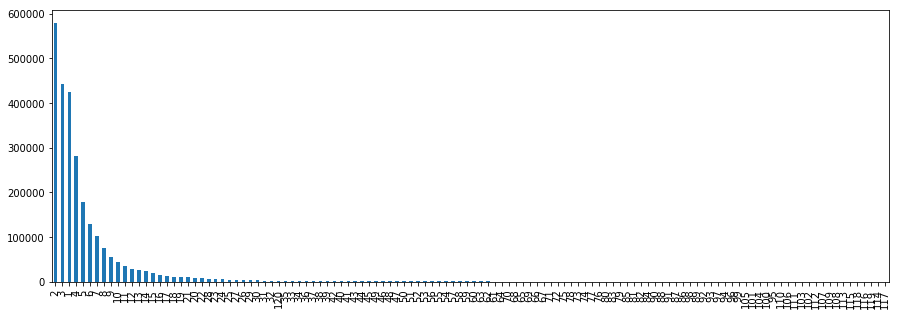

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
df['Length of Stay'].value_counts().plot(kind='bar')

Hospital Service Area


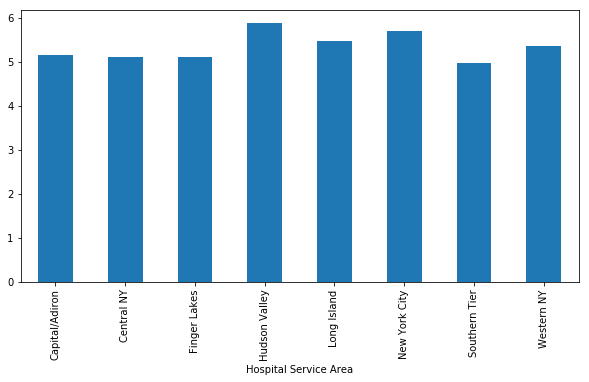

Hospital County


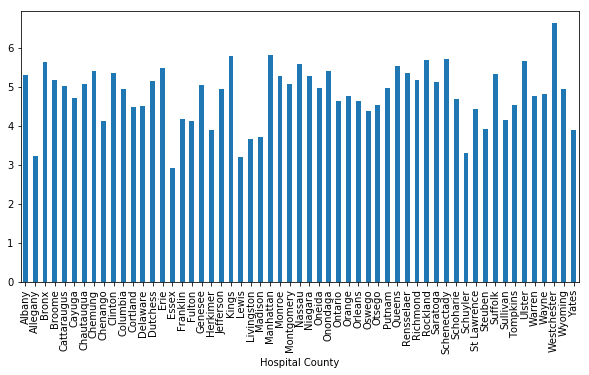

Age Group


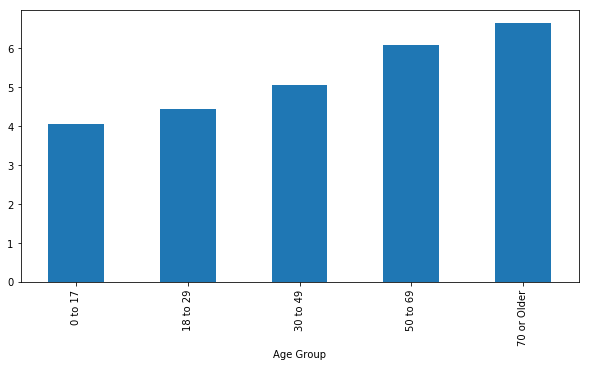

Zip Code - 3 digits


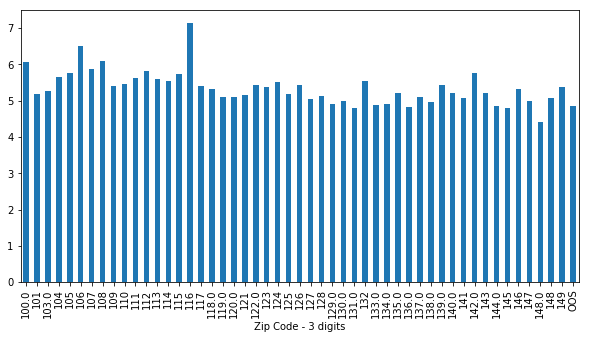

Gender


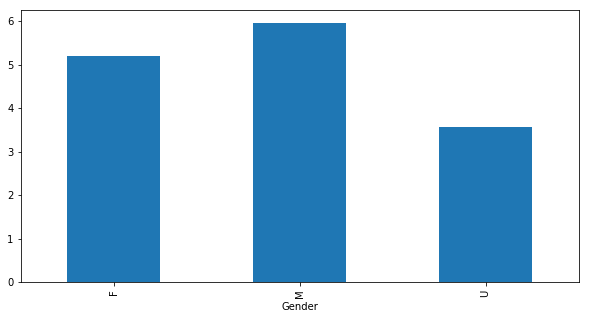

Race


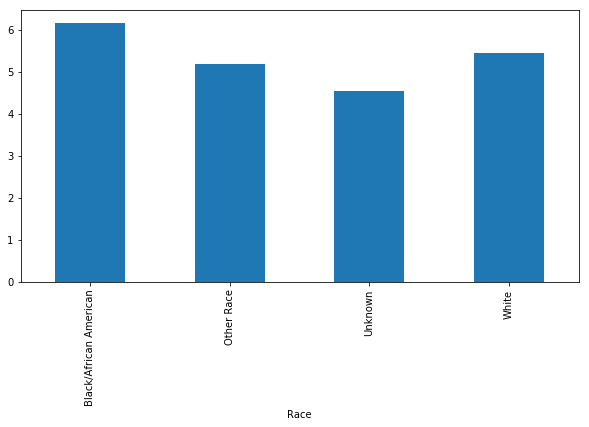

Ethnicity


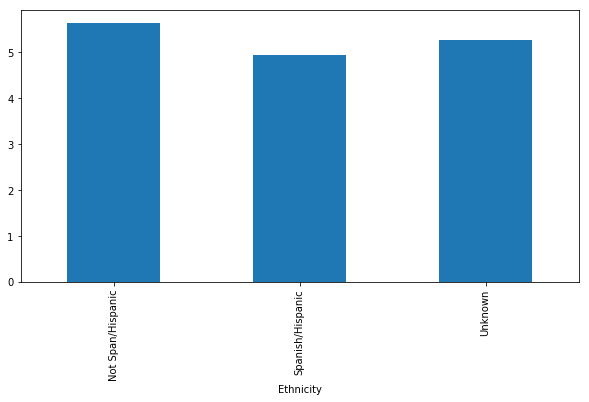

Type of Admission


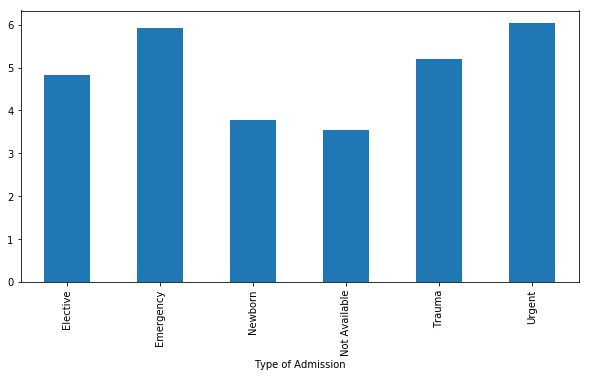

APR Severity of Illness Description


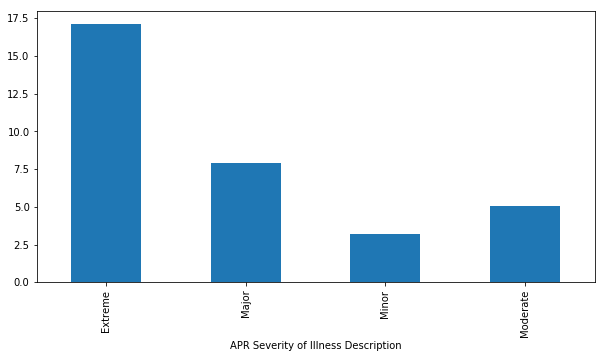

APR Risk of Mortality


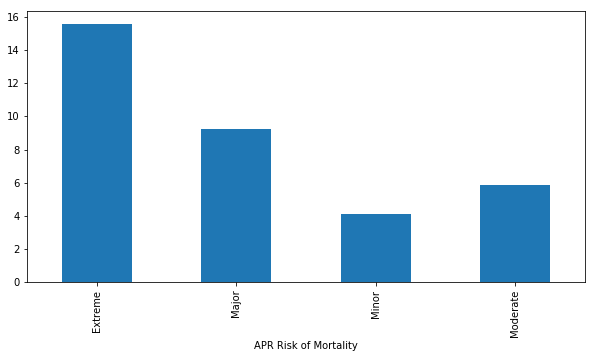

APR Medical Surgical Description


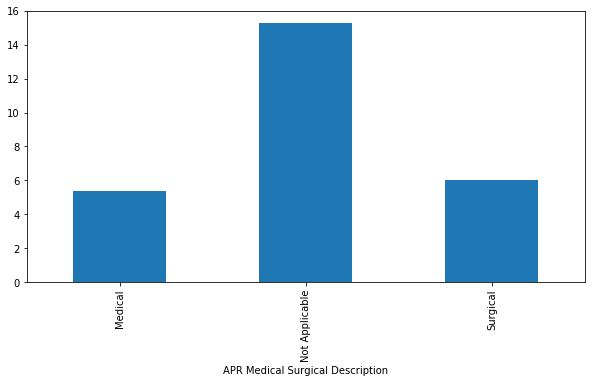

Payment Typology 1


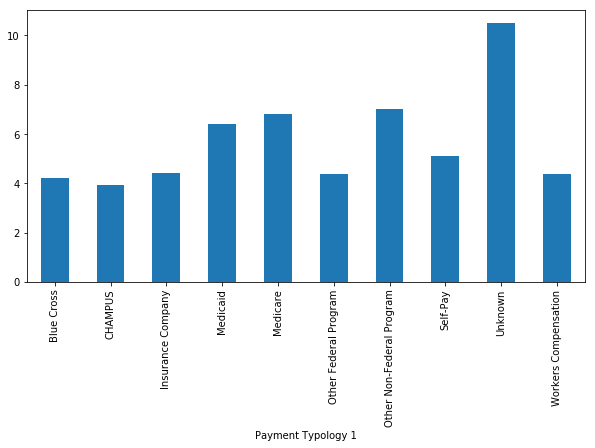

Payment Typology 2


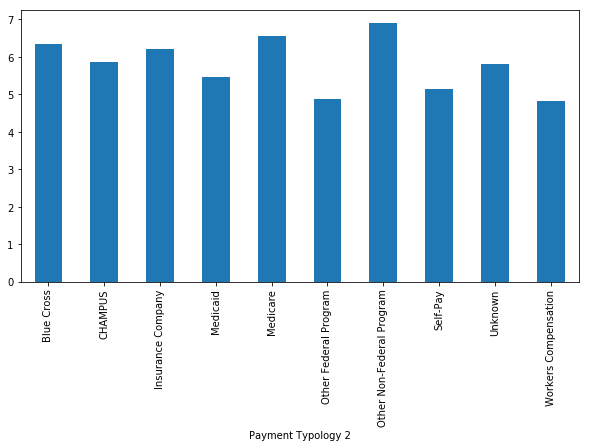

Payment Typology 3


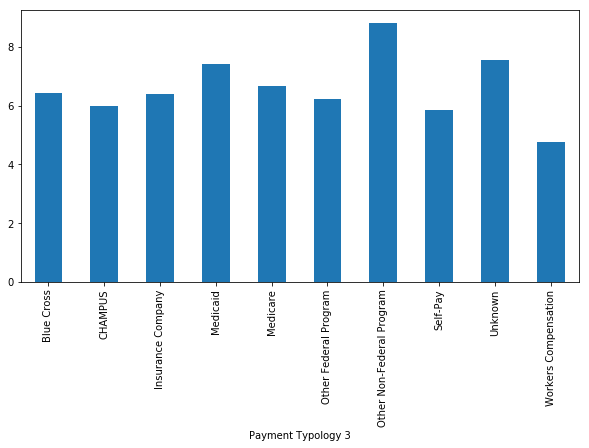

Abortion Edit Indicator


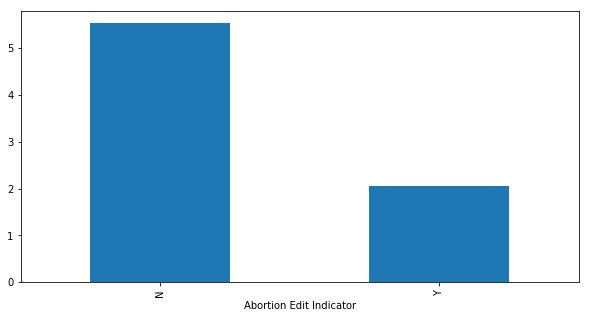

Emergency Department Indicator


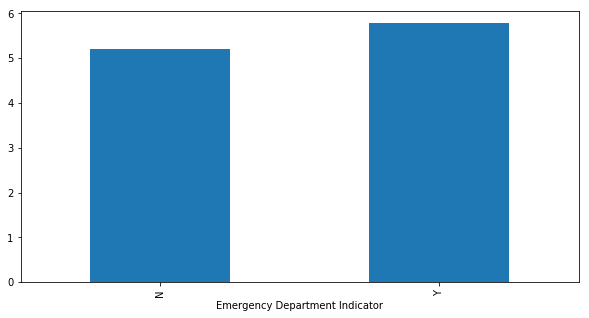

CCS Diagnosis Code


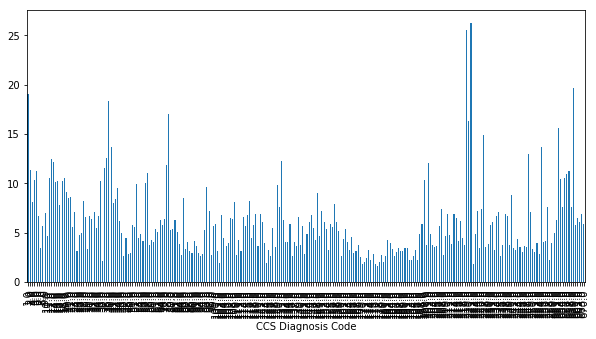

CCS Procedure Code


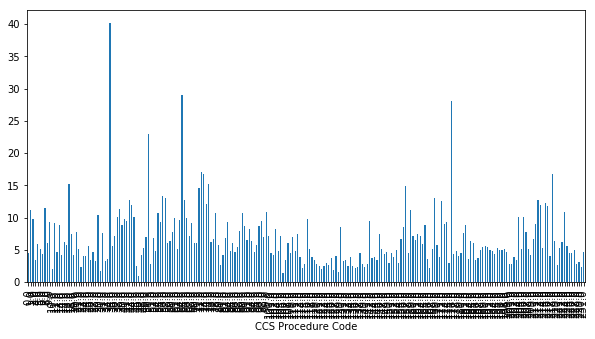

APR DRG Code


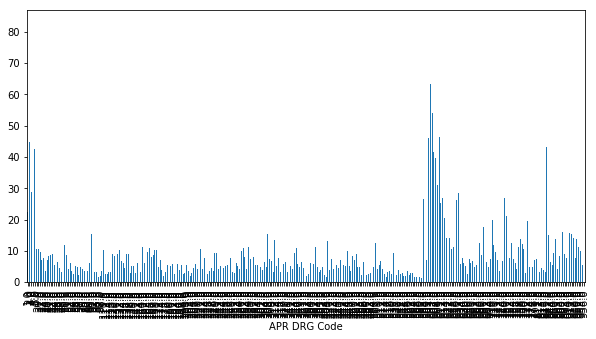

APR MDC Code


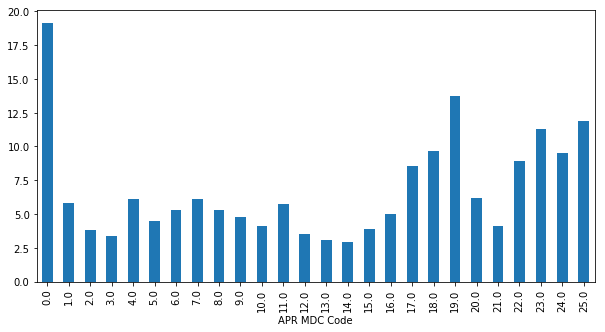

APR Severity of Illness Code


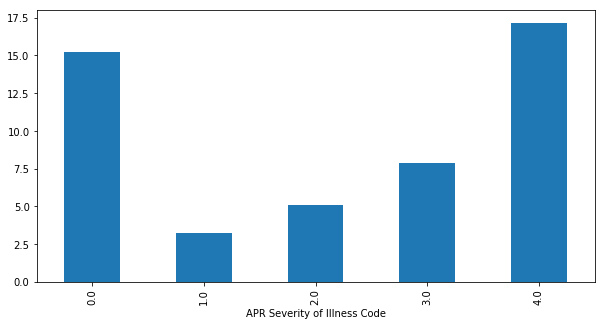

In [25]:
for column in cats:
    plt.figure(figsize=(10,5))
    print(column)
    df.groupby(column).mean()['Length of Stay'].plot.bar()
    plt.show()


# <span style="color:blue">Begin Modeling</span>

In [5]:
!pip install xgboost

You are using pip version 10.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Start with small sample for hyperparameter search

In [50]:
df_s = (df.sample(100000)
          .reset_index()
          .drop('index',axis=1))

In [28]:
# confirm index is reset
df_s.head(2)

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator
0,New York City,Manhattan,1446.0,50 to 69,103,F,White,Not Span/Hispanic,1,Elective,205.0,216.0,347.0,8.0,2.0,Moderate,Minor,Medical,Workers Compensation,Self-Pay,NaN,0.0,N,N
1,New York City,Manhattan,1456.0,50 to 69,100,M,Black/African American,Not Span/Hispanic,10,Emergency,99.0,216.0,194.0,5.0,4.0,Extreme,Extreme,Medical,Insurance Company,Medicaid,Self-Pay,0.0,N,Y


### Split into train and holdout

In [63]:
from sklearn.model_selection import train_test_split
X = df_s.drop('Length of Stay', axis=1)
y = df_s['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1911)

### Target encoder with regularization

In [30]:
import numpy as np
target_mean = df_s['Length of Stay'].mean()

def mean_dict(df: pd.DataFrame, column: str, target: str, weight: int):
    """
    Return dict with regularized target encoding values. 
    """
    
    agg = df.groupby(column)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    
    smoothed = (counts * means + weight * target_mean) / (counts + weight)
    smoothed[np.nan] = target_mean
    
    return smoothed.to_dict()

In [64]:
enc_dict = {}
for cat in cats:
    enc_dict[cat] = mean_dict(df_s.iloc[X_train.index], cat, 'Length of Stay', 100)

In [65]:
for cat in cats:
    X_train[cat] = X_train[cat].map(enc_dict[cat])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [35]:
X_train.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator
77658,5.068886,5.509847,630.0,6.562055,5.218206,5.174835,5.410269,5.599583,6.011702,7.500161,4.503951,6.715573,5.510121,7.816560,7.816560,5.919050,5.343399,6.768064,6.275817,5.738881,0.0,5.506714,5.750836
18015,5.351080,5.208026,103.0,6.562055,4.988963,5.922343,5.410269,5.599583,6.011702,3.637867,4.670141,5.102007,6.150535,7.816560,7.816560,9.045027,5.343399,6.768064,5.506310,5.506310,0.0,5.506714,5.750836
20912,5.351080,5.511252,3067.0,6.562055,5.076951,5.922343,5.410269,5.599583,5.868923,6.913654,4.503951,5.163197,5.361558,5.060602,5.060602,4.106197,5.343399,6.768064,5.155970,5.506310,0.0,5.506714,5.750836
8354,5.664876,5.508712,1638.0,6.138104,5.639462,5.922343,5.410269,4.926568,5.868923,5.376181,10.367317,10.407281,5.361558,7.816560,7.816560,9.045027,6.017152,4.419333,5.329198,5.506310,0.0,5.506714,5.750836
27526,6.058474,6.899269,1045.0,6.562055,6.051388,5.174835,5.410269,5.599583,5.868923,8.479384,4.503951,6.692923,5.924237,7.816560,7.816560,9.045027,5.343399,6.768064,6.242191,5.506310,0.0,5.506714,5.750836


In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
param_grid = {
              'objective':['reg:linear'],
              'learning_rate': [0.05, .07], #so called `eta` value
              'max_depth': [3, 4, 5],
              'min_child_weight': [4, 5],
              'silent': [1],
              'subsample': [0.7],
              'n_estimators': [200]}

xgb_grid = GridSearchCV(xgb1,
                        param_grid,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

In [67]:
xgb_grid.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed:   20.1s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   22.8s finished
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'objective': ['reg:linear'], 'learning_rate': [0.05, 0.07], 'max_depth': [3, 4, 5], 'min_child_weight': [4, 5], 'silent': [1], 'subsample': [0.7], 'n_estimators': [200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [68]:
from sklearn.metrics import mean_absolute_error

# encode X_test
for cat in cats:
    X_test[cat] = X_test[cat].map(enc_dict[cat])

print(mean_absolute_error(y_test, xgb_grid.predict(X_test)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


2.7925495087385177


In [49]:
y_test.mean()

5.5585

# <span style="color:blue">Understand Model</span>

### Observation

I'm not especially pleased with this result but time is pretty limited. Let's take a quick look at what's happening with the model before using the best params from the gridsearch to train on the whole dataset. 

In [73]:
test = df_s.copy()
for cat in cats:
    test[cat] = test[cat].map(enc_dict[cat])

for length_of_stay in range(2,20):
    Xt = test[test['Length of Stay'] < length_of_stay].drop('Length of Stay',axis=1)
    Yt = test['Length of Stay'][test['Length of Stay'] < length_of_stay]
    print(f'{length_of_stay}: ', mean_absolute_error(Yt, xgb_grid.predict(Xt)))

2:  2.3146308791965517
3:  1.7320443712829106
4:  1.5988142116722452
5:  1.6047100043430502
6:  1.6466365223208304
7:  1.6996652542111992
8:  1.7584804976290553
9:  1.8084974820310749
10:  1.855147538744304
11:  1.8954918274426245
12:  1.931452782810327
13:  1.9662805151696237
14:  1.9952654048111054
15:  2.028053056116658
16:  2.0593256435574143
17:  2.0843918689119554
18:  2.106878708764817
19:  2.129329348364168


In [78]:
x_plot = []
y_plot = []

for length_of_stay in range(1,35):
    x_plot.append(length_of_stay)
    Xt = test[test['Length of Stay'] == length_of_stay].drop('Length of Stay',axis=1)
    Yt = test['Length of Stay'][test['Length of Stay'] == length_of_stay]
    mae = mean_absolute_error(Yt, xgb_grid.predict(Xt))
    y_plot.append(mae)
    print(f'{length_of_stay}: ', mae)

1:  2.3146308791965517
2:  1.3009967921179164
3:  1.2962844941721947
4:  1.6344955360078177
5:  2.0485277310597243
6:  2.4785433585584498
7:  2.9322503554945665
8:  3.2395544605417834
9:  3.66587662277892
10:  3.9767656444727777
11:  4.41619553108408
12:  4.649384032957173
13:  4.777571239892175
14:  5.2419390125386025
15:  6.033500590831123
16:  6.044939731149112
17:  6.538987996180852
18:  7.285764052672087
19:  7.675679918819879
20:  7.63289603247787
21:  7.9921848673038385
22:  8.94575286252158
23:  8.77257172042775
24:  10.281448001161628
25:  10.712892608798068
26:  11.287036688296826
27:  11.849480025161652
28:  10.57484127260604
29:  12.489637475543551
30:  13.5909633117147
31:  15.230184529957018
32:  16.36066919368702
33:  15.69476063200768
34:  18.193434596061707


<BarContainer object of 34 artists>

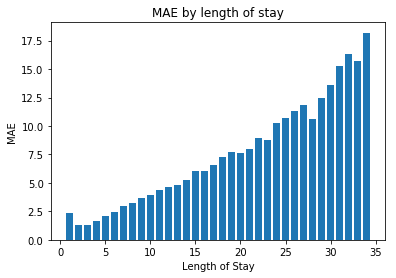

In [79]:
plt.title('MAE by length of stay')
plt.xlabel('Length of Stay')
plt.ylabel('MAE')
plt.bar(x_plot,y_plot)

In [81]:
x_plot = []
y_plot = []

for length_of_stay in range(10,130,10):
    x_plot.append(length_of_stay)
    Xt = test[test['Length of Stay'] == length_of_stay].drop('Length of Stay',axis=1)
    Yt = test['Length of Stay'][test['Length of Stay'] == length_of_stay]
    mae = mean_absolute_error(Yt, xgb_grid.predict(Xt))
    y_plot.append(mae)
    print(f'{length_of_stay}: ', mae)

10:  3.9767656444727777
20:  7.63289603247787
30:  13.5909633117147
40:  18.789116458689914
50:  25.850651330418057
60:  32.66028933525085
70:  42.873282139117904
80:  47.757101440429686
90:  40.87402089436849
100:  65.91111501057942
110:  50.78170394897461
120:  81.75179507884573


<BarContainer object of 12 artists>

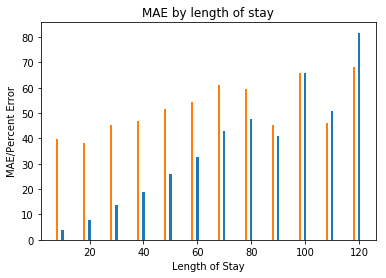

In [82]:
plt.title('MAE by length of stay')
plt.xlabel('Length of Stay')
plt.ylabel('MAE/Percent Error')
plt.bar(x_plot,y_plot)
plt.bar((np.array(x_plot)-2),((np.array(y_plot)/np.array(x_plot)*100)))

In [ ]:
!pip install shap

In [88]:
X_train.head()

,Hospital Service Area,Hospital County,Permanent Facility Id,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator
77658,5.711169,5.851320,1320.0,6.585940,5.784766,5.959934,6.201731,5.635840,5.932372,7.930012,9.537121,7.052162,5.755827,7.863456,7.863456,9.248187,5.365004,6.818892,6.273011,5.829805,0.0,5.538252,5.264894
18015,5.711169,5.858128,1445.0,5.079393,6.112241,5.959934,6.201731,5.635840,5.932372,5.748799,6.217729,4.828603,6.127110,3.233856,3.233856,4.096045,5.365004,4.427693,5.441233,5.506310,0.0,5.538252,5.264894
20912,5.711169,5.358806,1630.0,6.585940,5.495074,5.199049,5.255480,5.635840,5.932372,5.651838,4.537150,5.644812,4.464338,3.233856,3.233856,4.096045,5.365004,4.427693,6.526470,5.829805,0.0,5.538252,5.748198
8354,5.987589,6.704372,1047.0,5.079393,6.112241,5.959934,5.418800,4.992588,5.932372,11.396956,4.537150,12.225185,13.498370,5.036522,5.036522,4.096045,5.365004,6.492224,5.292991,5.506310,0.0,5.538252,5.264894
27526,5.711169,5.742333,1172.0,4.370567,5.761875,5.199049,6.201731,5.635840,5.932372,3.401292,3.947014,3.949188,2.958735,3.233856,3.233856,4.096045,6.078985,4.427693,5.441233,5.506310,0.0,5.538252,5.748198


In [90]:
params = {'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

xgbr = XGBRegressor(**params)
model = xgbr.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [93]:
import shap
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_train)

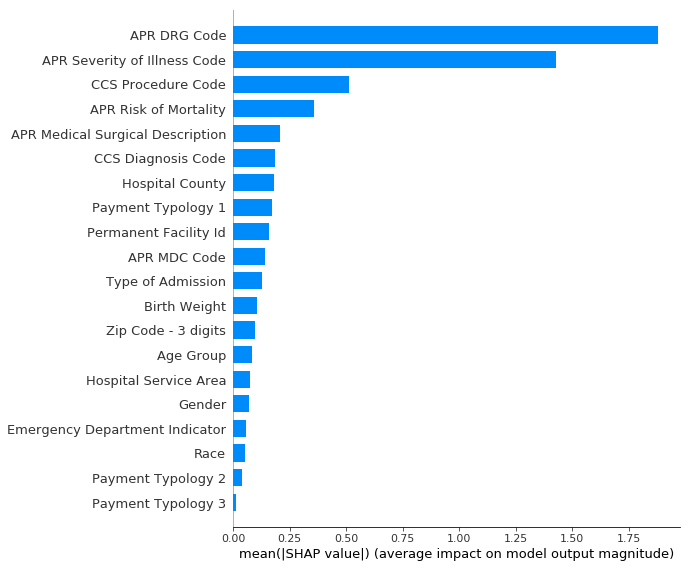

In [94]:
# shap feature importance
shap.summary_plot(shap_values, X, plot_type="bar")

# <span style="color:blue">Train Big Model</span>

In [ ]:
# data
X = df.drop('Length of Stay', axis=1)
y = df['Length of Stay']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=1911)

# create encoder using train to avoid leackage to test
enc_dict = {}
for cat in cats:
    enc_dict[cat] = mean_dict(df.iloc[X_train.index], cat, 'Length of Stay', 100)

# apply encoder
for cat in cats:
    X_train[cat] = X_train[cat].map(enc_dict[cat])

# use model with best params
params = {'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 200,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

xgbr = XGBRegressor(**params)
model = xgbr.fit(X_train, y_train)

In [99]:
# encode X_test using dicionary built on X_train
for cat in cats:
    X_test[cat] = X_test[cat].map(enc_dict[cat])

# check our mae on the holdout
print('MAE: ', mean_absolute_error(y_test, xgb_grid.predict(X_test)))
print('Mean: ', y_test.mean())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


MAE:  3.286588253281486
Mean:  5.5331669633896405


## <span style="color:blue">Let's see if a neural network can improve our performance</span>

In [1]:
!pip install fastai

    100% |████████████████████████████████| 235kB 8.2MB/s ta 0:00:01
    100% |████████████████████████████████| 20.4MB 2.0MB/s eta 0:00:01
    100% |████████████████████████████████| 30.9MB 1.1MB/s ta 0:00:011
    100% |████████████████████████████████| 748.9MB 55kB/s  eta 0:00:01  4% |█▍                              | 32.5MB 49.0MB/s eta 0:00:15    34% |███████████▏                    | 261.9MB 48.8MB/s eta 0:00:10    63% |████████████████████▎           | 474.4MB 33.5MB/s eta 0:00:09    80% |█████████████████████████▊      | 601.9MB 44.8MB/s eta 0:00:04    82% |██████████████████████████▌     | 620.9MB 45.7MB/s eta 0:00:03    97% |███████████████████████████████▎| 733.2MB 49.3MB/s eta 0:00:01
    100% |████████████████████████████████| 8.8MB 7.0MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 33.3MB/s ta 0:00:01
    100% |████████████████████████████████| 2.1MB 6.8MB/s ta 0:00:011
    100% |████████████████████████████████| 184kB 20.4MB/s ta 0:00:01
    100% |██████

In [11]:
from fastai.tabular import *

In [30]:
tab_df = df.sample(1000000)

In [31]:
cats = df.columns[(df.dtypes != 'float64') & (df.dtypes != 'int')].to_list()
cats.extend(['CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 
            'APR MDC Code', 'APR Severity of Illness Code'])

In [32]:
conts = ['Permanent Facility Id', 'Length of Stay', 'Birth Weight']

In [33]:
dep_var = 'Length of Stay'
cat_names = cats
cont_names = conts
procs = [FillMissing, Categorify, Normalize]

In [34]:
test_df = TabularList.from_df(tab_df.iloc[750000:1000000].copy(), cat_names=cat_names, cont_names=cont_names)

In [35]:
data = (TabularList.from_df(tab_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(750000,1000000)))
                           .label_from_df(cols=dep_var, label_cls=FloatList)
                           .add_test(test_df)
                           .databunch())

In [40]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_absolute_error)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


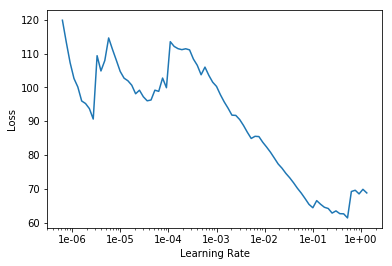

In [41]:
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,4.348839,5.101065,1.287625,02:55


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


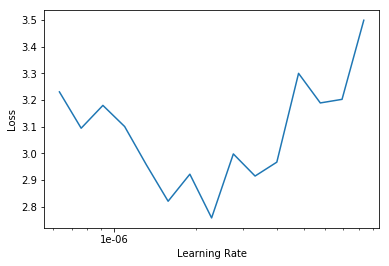

In [43]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit(1, 1e-6)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,2.666257,1.446527,0.729386,02:54


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


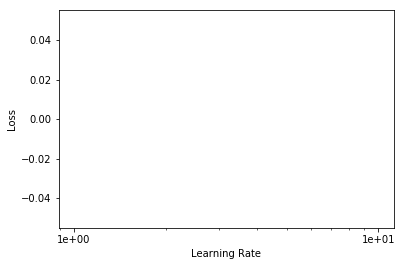

In [45]:
learn.lr_find()
learn.recorder.plot()

### MAE of 0.73 - not bad

In [46]:
tab_df['Length of Stay'].mean()

5.513024